In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

df = pd.read_csv('/content/Age _Fossil.csv')

# NCek ver

In [ ]:
pip install --upgrade pip

In [ ]:
!pip --version

pip 24.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!python --version

Python 3.10.12


In [ ]:
pickle

<module 'pickle' from '/usr/lib/python3.10/pickle.py'>

In [ ]:
import pickle
print(pickle.format_version)

4.0


In [ ]:
import streamlit
print(streamlit.__version__)

1.38.0


In [ ]:
import PIL
print(pd.__version__)

2.1.4


# Age

In [ ]:
df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

Cek Target

In [ ]:
df.describe()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,age
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,0.486938,0.430116,0.532054,152.832801,0.938315,70.702460,326.655177,40586.656435
std,0.257132,0.233536,0.287929,86.272234,0.521643,37.352584,187.032333,15200.700905
min,0.000241,0.000244,0.000076,0.130000,0.000275,0.130000,0.620000,4208.000000
25%,0.294091,0.246269,0.316775,85.390000,0.533519,42.487500,181.047500,29766.250000
50%,0.473715,0.416046,0.511830,146.000000,0.905684,68.785000,308.260000,39567.000000
75%,0.658012,0.590752,0.723805,211.932500,1.289307,96.440000,455.520000,50550.500000
max,1.533270,1.000000,1.513325,494.200000,3.071434,216.390000,1010.090000,103079.000000


<ipython-input-231-5aebaf628b8d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],bins=20)


<Axes: xlabel='age', ylabel='Density'>

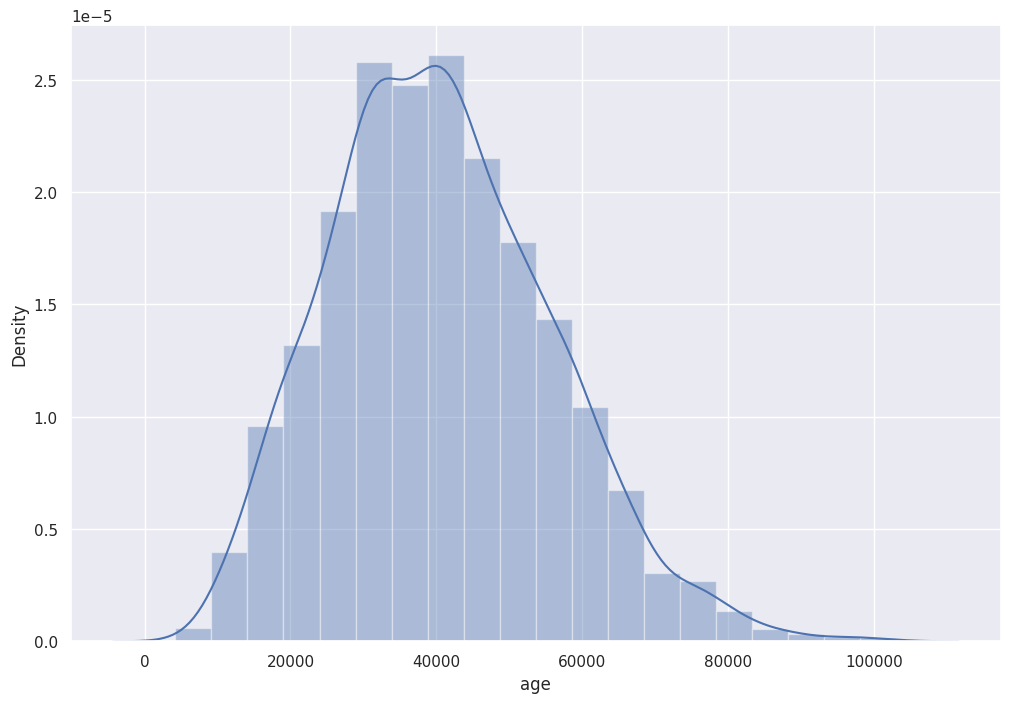

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df['age'],bins=20)

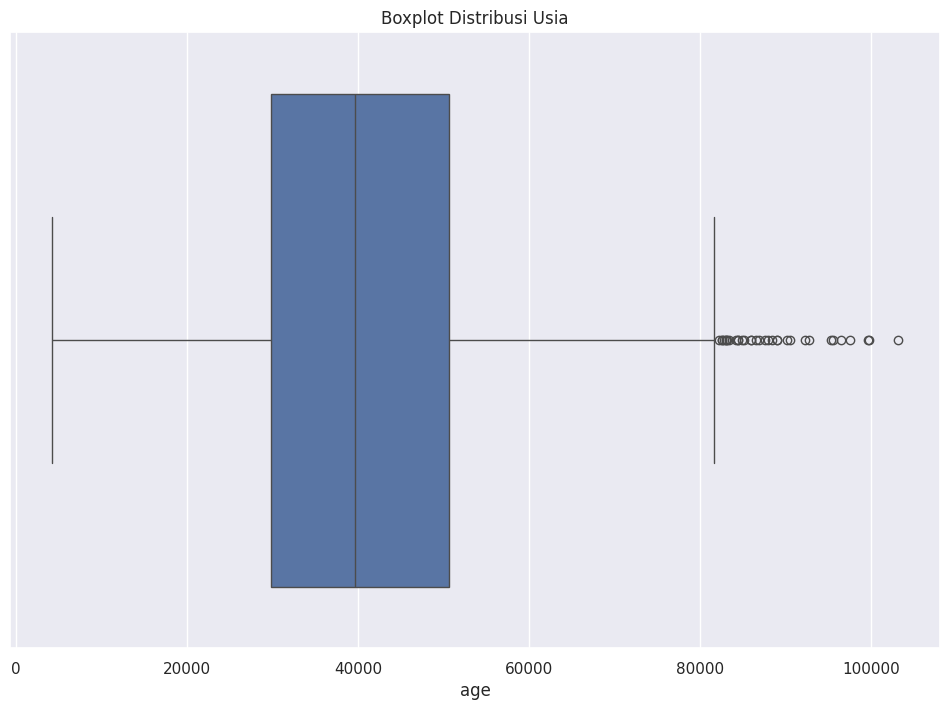

In [ ]:
sns.boxplot(x='age', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()

In [ ]:
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  return outliers

def n_detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  num_outliers = len(outliers)

  return num_outliers

outliers_age = n_detect_outliers(df, 'age')
print("Outliers pada kolom 'age':")
outliers_age

Outliers pada kolom 'age':


33

Handle Outliers

In [ ]:
def drop_outliers(df, column, whiskers=1.5):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - whiskers * IQR
  upper_bound = Q3 + whiskers * IQR

  # Drop outliers
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  return df

def cap_outliers(df, column, whiskers=1.5):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - whiskers * IQR
  upper_bound = Q3 + whiskers * IQR

  # Cap outliers
  df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

  return df

In [ ]:
df = cap_outliers(df, 'age')

In [ ]:
'''sns.boxplot(x='age', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()'''

"sns.boxplot(x='age', data=df)\nplt.title('Boxplot Distribusi Usia')\nplt.show()"

In [ ]:
'''numeric_cols = df.select_dtypes(include=['number']).drop('age', axis=1)

# Buat boxplot untuk setiap kolom numerik dalam satu plot
sns.boxplot(data=numeric_cols)
plt.title('Boxplot Distribusi Semua Variabel Numerik (Kecuali Age)')
plt.xticks(rotation=45)  # Rotasi label x-axis jika terlalu panjang
plt.show()'''

"numeric_cols = df.select_dtypes(include=['number']).drop('age', axis=1)\n\n# Buat boxplot untuk setiap kolom numerik dalam satu plot\nsns.boxplot(data=numeric_cols)\nplt.title('Boxplot Distribusi Semua Variabel Numerik (Kecuali Age)')\nplt.xticks(rotation=45)  # Rotasi label x-axis jika terlalu panjang\nplt.show()"

In [ ]:
numeric_features = df.drop('age', axis=1).select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(exclude=['int64', 'float64']).columns

# Untuk semua kolom numerik
for col in numeric_features:
  outliers = n_detect_outliers(df, col)
  print(f"Outliers pada kolom '{col}':")
  print(outliers)

Outliers pada kolom 'uranium_lead_ratio':
13
Outliers pada kolom 'carbon_14_ratio':
0
Outliers pada kolom 'radioactive_decay_series':
19
Outliers pada kolom 'stratigraphic_layer_depth':
23
Outliers pada kolom 'isotopic_composition':
18
Outliers pada kolom 'fossil_size':
15
Outliers pada kolom 'fossil_weight':
19


In [ ]:
# Coba handle semua outlier yang ada

for feature in numeric_features:
    df = cap_outliers(df, feature)

# Untuk semua kolom numerik
for col in numeric_features:
  outliers = n_detect_outliers(df, col)
  print(f"Outliers pada kolom '{col}':")
  print(outliers)

Outliers pada kolom 'uranium_lead_ratio':
0
Outliers pada kolom 'carbon_14_ratio':
0
Outliers pada kolom 'radioactive_decay_series':
0
Outliers pada kolom 'stratigraphic_layer_depth':
0
Outliers pada kolom 'isotopic_composition':
0
Outliers pada kolom 'fossil_size':
0
Outliers pada kolom 'fossil_weight':
0


In [ ]:
'''
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'geological_period':
['Cretaceous' 'Cambrian' 'Permian' 'Devonian' 'Jurassic' 'Neogene'
 'Triassic' 'Paleogene' 'Ordovician' 'Carboniferous' 'Silurian']

Nilai unik pada kolom 'paleomagnetic_data':
['Normal polarity' 'Reversed polarity']

Nilai unik pada kolom 'inclusion_of_other_fossils':
[False  True]

Nilai unik pada kolom 'surrounding_rock_type':
['Conglomerate' 'Limestone' 'Shale' 'Sandstone']

Nilai unik pada kolom 'stratigraphic_position':
['Middle' 'Top' 'Bottom']
'''

'\nfor col in df.columns:\n    print(f"Nilai unik pada kolom \'{col}\':")\n    print(df[col].unique())\n    print()  # Tambahkan baris kosong untuk pemisah\n\nNilai unik pada kolom \'geological_period\':\n[\'Cretaceous\' \'Cambrian\' \'Permian\' \'Devonian\' \'Jurassic\' \'Neogene\'\n \'Triassic\' \'Paleogene\' \'Ordovician\' \'Carboniferous\' \'Silurian\']\n\nNilai unik pada kolom \'paleomagnetic_data\':\n[\'Normal polarity\' \'Reversed polarity\']\n\nNilai unik pada kolom \'inclusion_of_other_fossils\':\n[False  True]\n\nNilai unik pada kolom \'surrounding_rock_type\':\n[\'Conglomerate\' \'Limestone\' \'Shale\' \'Sandstone\']\n\nNilai unik pada kolom \'stratigraphic_position\':\n[\'Middle\' \'Top\' \'Bottom\']\n'

In [ ]:
'''
# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# One-hot encode categorical variables
encoder = LabelEncoder(sparse=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
encoded_categorical.columns = encoder.get_feature_names_out(categorical_features)

# Concatenate encoded columns and drop original categorical columns
df = pd.concat([df, encoded_categorical], axis=1)
df = df.drop(categorical_features, axis=1)'''

"\n# Identify categorical features\ncategorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()\n\n# One-hot encode categorical variables\nencoder = LabelEncoder(sparse=False)\nencoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_features]))\nencoded_categorical.columns = encoder.get_feature_names_out(categorical_features)\n\n# Concatenate encoded columns and drop original categorical columns\ndf = pd.concat([df, encoded_categorical], axis=1)\ndf = df.drop(categorical_features, axis=1)"

In [ ]:
'''
# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Membuat objek LabelEncoder
le = LabelEncoder()

# Melakukan label encoding pada setiap kolom
for col in categorical_features:
    df[col] = le.fit_transform(df[col])
'''

"\n# Identify categorical features\ncategorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()\n\n# Membuat objek LabelEncoder\nle = LabelEncoder()\n\n# Melakukan label encoding pada setiap kolom\nfor col in categorical_features:\n    df[col] = le.fit_transform(df[col])\n"

In [ ]:
df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523.0
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112.0
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480.0
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228.0
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217.0


In [ ]:
# ada kolom yang sifatnya perlu diurutkan

ordinal_encoder = OrdinalEncoder()

df[categorical_features] = ordinal_encoder.fit_transform(df[categorical_features])

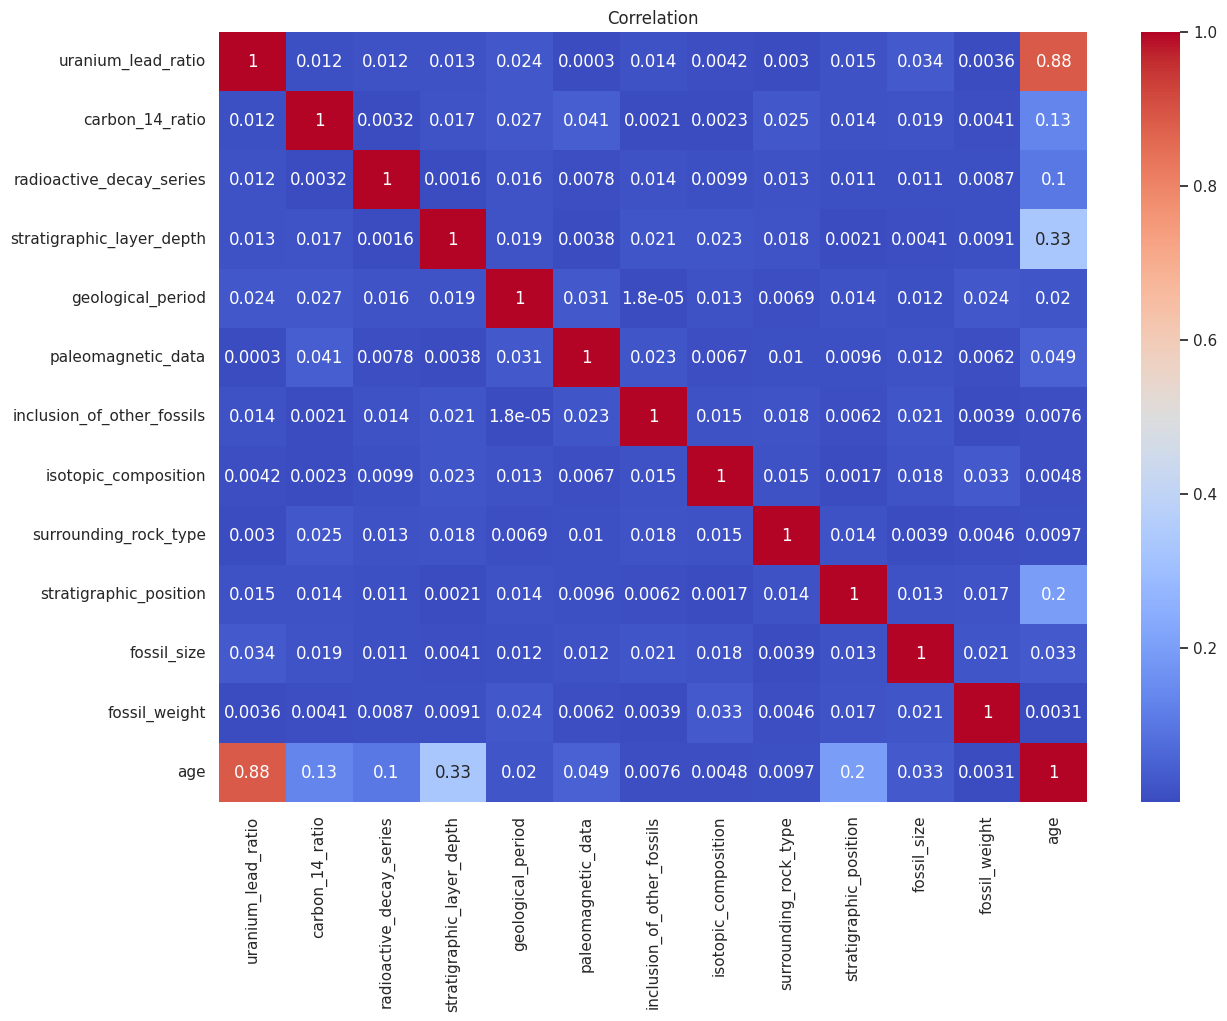

In [ ]:
df_corr = abs(df.corr()) # Absoulte korelasi

plt.figure(figsize=(14,10))
plt.title('Correlation')
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
age_corr = df_corr.drop('age', axis=0)['age']

features = age_corr[age_corr >= .01].index

features

Index(['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series',
       'stratigraphic_layer_depth', 'geological_period', 'paleomagnetic_data',
       'stratigraphic_position', 'fossil_size'],
      dtype='object')

In [ ]:
df[features].head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,stratigraphic_position,fossil_size
0,0.738061,0.487707,0.907884,91.17,2.0,0.0,1.0,50.65
1,0.560096,0.341738,1.121302,165.44,0.0,0.0,2.0,48.85
2,0.424773,0.218493,0.103855,218.98,0.0,0.0,0.0,37.66
3,0.349958,0.704649,0.383617,51.09,8.0,0.0,0.0,39.10
4,0.886811,0.777494,0.593254,313.72,3.0,0.0,2.0,90.84


In [ ]:
X = df[features]
y = df['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((3518, 8), (880, 8))

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 6604103.303910885
Testing MSE: 6517351.259131399
Training R2 Score: 0.9707162316771071
Testing R2 Score: 0.9714784498588505


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=9, min_samples_leaf=4)

In [ ]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 4401090.509587767
Testing MSE: 13747224.078594835
Training R2 Score: 0.9804847821240881
Testing R2 Score: 0.939838728147435


In [ ]:
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
xgb_regressor = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 1220457.7295604572
Testing MSE: 2296495.6170384116
Training R2 Score: 0.9945882734179571
Testing R2 Score: 0.9899499639829109


In [ ]:
from sklearn.linear_model import HuberRegressor

huber_reg = HuberRegressor()
param_grid = {'epsilon': [1.0, 1.35, 1.5, 2.0]}  # Adjust these values as needed
grid_search = GridSearchCV(estimator=huber_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
best_huber_regressor = HuberRegressor(**best_params)
best_huber_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

Best hyperparameters: {'epsilon': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor(epsilon=1.0)

In [ ]:
y_pred_train = best_huber_regressor.predict(X_train)
y_pred_test = best_huber_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 8183333.312323595
Testing MSE: 7828733.234895387
Training R2 Score: 0.9637136450174569
Testing R2 Score: 0.9657395161588219


In [ ]:
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(best_huber_regressor)

In [ ]:
model_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('huberregressor', HuberRegressor(epsilon=1.0))])

In [ ]:
y_pred_test = model_pipeline.predict(X_test)
y_pred_train = model_pipeline.predict(X_train)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [ ]:
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 8183333.312323595
Testing MSE: 7828733.234895387
Training R2 Score: 0.9637136450174569
Testing R2 Score: 0.9657395161588219


# Inference

In [ ]:
X

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,stratigraphic_position,fossil_size
0,0.738061,0.487707,0.907884,91.17000,2.0,0.0,1.0,50.65
1,0.560096,0.341738,1.121302,165.44000,0.0,0.0,2.0,48.85
2,0.424773,0.218493,0.103855,218.98000,0.0,0.0,0.0,37.66
3,0.349958,0.704649,0.383617,51.09000,8.0,0.0,0.0,39.10
4,0.886811,0.777494,0.593254,313.72000,3.0,0.0,2.0,90.84
...,...,...,...,...,...,...,...,...
4393,0.049660,0.601750,0.762490,222.54000,4.0,1.0,0.0,91.69
4394,0.360085,0.215033,1.002406,276.70000,2.0,1.0,0.0,68.97
4395,0.464864,0.553313,0.659639,76.77000,3.0,0.0,1.0,11.37
4396,0.803338,0.272392,0.123562,204.82000,5.0,1.0,0.0,132.34


In [ ]:
new_data = [0.567, 0.777, 0.921, 91, 'Cretaceous', 'Normal polarity', 'Middle', 50.65]
new_data

[0.567, 0.777, 0.921, 91, 'Cretaceous', 'Normal polarity', 'Middle', 50.65]

In [ ]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

model_pipeline = make_pipeline(ordinal_encoder, best_huber_regressor)

model_pipeline.fit(X_train, y_train)

new_data = pd.DataFrame([new_data], columns=X.columns)

prediction = model_pipeline.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
prediction

array([4710.25286854])

# Load Model

In [ ]:
import pickle
with open('model_huber.pkl', 'wb') as model_file:
  pickle.dump(model_pipeline, model_file)

# Try Model Pickle

In [ ]:
with open('model_huber.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

new_data = [0.567, 0.777, 0.921, 91, 'Cretaceous', 'Normal polarity', 'Middle', 50.65]
new_data = pd.DataFrame([new_data], columns=X.columns)

predictions = loaded_model.predict(new_data)

predictions

array([4710.25286854])

# Streamlit

In [ ]:
!pip --version

pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!pip --version

pip 24.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.125.252.183


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.252.183:8501

your url is: https://wicked-loops-create.loca.lt
  Stopping...
^C


# T